In [4]:
import tensorflow as tf
tf.__version__

'1.2.0'

In [5]:
import keras as keras
keras.__version__

'2.0.5'

### Loading the dataset

In [6]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [7]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [8]:
train_data.shape

(25000,)

In [9]:
test_data.shape

(25000,)

In [10]:
train_labels.shape

(25000,)

In [11]:
test_labels.shape

(25000,)

In [12]:
max([max(sequence) for sequence in train_data]) # max word index

9999

In [13]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

### Reversing the mapping to read a sampled review

In [14]:
word_index = imdb.get_word_index()

In [15]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [16]:
reverse_word_index = [(value, key) for (key, value) in word_index.items()]
reverse_word_index

[(34701, 'fawn'),
 (52006, 'tsukino'),
 (52007, 'nunnery'),
 (16816, 'sonja'),
 (63951, 'vani'),
 (1408, 'woods'),
 (16115, 'spiders'),
 (2345, 'hanging'),
 (2289, 'woody'),
 (52008, 'trawling'),
 (52009, "hold's"),
 (11307, 'comically'),
 (40830, 'localized'),
 (30568, 'disobeying'),
 (52010, "'royale"),
 (40831, "harpo's"),
 (52011, 'canet'),
 (19313, 'aileen'),
 (52012, 'acurately'),
 (52013, "diplomat's"),
 (25242, 'rickman'),
 (6746, 'arranged'),
 (52014, 'rumbustious'),
 (52015, 'familiarness'),
 (52016, "spider'"),
 (68804, 'hahahah'),
 (52017, "wood'"),
 (40833, 'transvestism'),
 (34702, "hangin'"),
 (2338, 'bringing'),
 (40834, 'seamier'),
 (34703, 'wooded'),
 (52018, 'bravora'),
 (16817, 'grueling'),
 (1636, 'wooden'),
 (16818, 'wednesday'),
 (52019, "'prix"),
 (34704, 'altagracia'),
 (52020, 'circuitry'),
 (11585, 'crotch'),
 (57766, 'busybody'),
 (52021, "tart'n'tangy"),
 (14129, 'burgade'),
 (52023, 'thrace'),
 (11038, "tom's"),
 (52025, 'snuggles'),
 (29114, 'francesco'),

In [17]:
reverse_word_index = dict(reverse_word_index)
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [18]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### One-hot encoding

In [19]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences), dimension))
    print("Shape sequences: ", sequences.shape)
    print("Shape results: ", results.shape)
    
    for i, sequence in enumerate(sequences):
        
        if (i == 1):
            print(sequence)
        
        for index in sequence:
            results[i, index] = 1. # set specific indices of results[i] to 1s
            
    return results

# our vectorized training data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
x_test[0]

Shape sequences:  (25000,)
Shape results:  (25000, 10000)
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]
Shape sequences:  (25000,)
Shape results:  (25000, 10000)
[1, 3452, 7, 2, 517, 522, 31, 314, 17, 1909, 2046, 2

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

### Encoding the labels to float 32 for our model

In [20]:
# our vectorized labels:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print("Shape train_labels: ", train_labels.shape)
print("Shape y_train: ", y_train.shape)
print("train_labels: ", train_labels)
print("y_train: ", y_train)

Shape train_labels:  (25000,)
Shape y_train:  (25000,)
train_labels:  [1 0 0 ..., 0 1 0]
y_train:  [ 1.  0.  0. ...,  0.  1.  0.]


In [34]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [35]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### or with a customizer class with parameter

In [36]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

### or with a custom loss function and metrics

In [37]:
from keras import losses, metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### Setting aside a validation set

In [21]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training our model 

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 1s - loss: 0.5444 - binary_accuracy: 0.7927 - val_loss: 0.4314 - val_binary_accuracy: 0.8524
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3461 - binary_accuracy: 0.8969 - val_loss: 0.3345 - val_binary_accuracy: 0.8757
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2547 - binary_accuracy: 0.9199 - val_loss: 0.2903 - val_binary_accuracy: 0.8906
Epoch 4/20
15000/15000 [==============================] - 2s - loss: 0.1971 - binary_accuracy: 0.9368 - val_loss: 0.2846 - val_binary_accuracy: 0.8862
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1613 - binary_accuracy: 0.9499 - val_loss: 0.2779 - val_binary_accuracy: 0.8884
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1326 - binary_accuracy: 0.9593 - val_loss: 0.2872 - val_binary_accuracy: 0.8859
Epoch 7/20
15000/15000 [====================

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

### Plotting training and validation loss

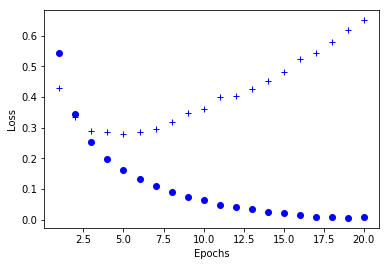

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss_values, 'bo')
# "b+" is for "blue crosses"
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

### Plotting training and validation accuracy

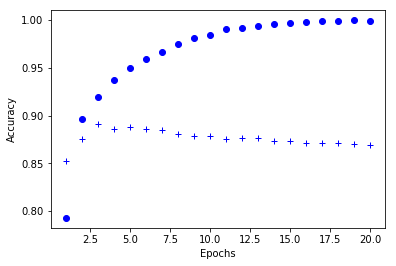

In [43]:
plt.clf() # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

### Let's try another network

In [22]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s - loss: 0.4618 - acc: 0.8181     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2683 - acc: 0.9066     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2038 - acc: 0.9288     
Epoch 4/4
24928/25000 [============================>.] - ETA: 0s

In [23]:
results

[0.29505067465305329, 0.88344]

In [24]:
model.predict(x_test)

array([[ 0.92138523],
       [ 0.94628912],
       [ 0.9996351 ],
       ..., 
       [ 0.78479165],
       [ 0.00667045],
       [ 0.85902399]], dtype=float32)

### With one hidden layer

In [38]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s - loss: 0.4568 - acc: 0.8263     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2802 - acc: 0.9070     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2209 - acc: 0.9251     
Epoch 4/4
24576/25000 [============================>.] - ETA: 0s

[0.28356841650009157, 0.88568000000000002]

### With 3 hidden layers

In [40]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 2s - loss: 0.5271 - acc: 0.7809     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.3044 - acc: 0.9048     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2154 - acc: 0.9280     
Epoch 4/4
24896/25000 [============================>.] - ETA: 0s

[0.30265990978240964, 0.88207999999999998]

### With 2 hidden layers of 32 hidden units each

In [41]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 4s - loss: 0.4205 - acc: 0.8211     
Epoch 2/4
25000/25000 [==============================] - 4s - loss: 0.2365 - acc: 0.9122     
Epoch 3/4
25000/25000 [==============================] - 4s - loss: 0.1906 - acc: 0.9300     
Epoch 4/4
24704/25000 [============================>.] - ETA: 0s

[0.34737146605968477, 0.86795999999999995]

### With 2 hidden layers and 64 hidden units each

In [42]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 8s - loss: 0.4156 - acc: 0.8192     
Epoch 2/4
25000/25000 [==============================] - 8s - loss: 0.2399 - acc: 0.9075     
Epoch 3/4
25000/25000 [==============================] - 7s - loss: 0.1886 - acc: 0.9290     
Epoch 4/4
25000/25000 [==============================] - 4s     


[0.38553527769088747, 0.86007999999999996]

### With mse loss instead of binary crossentropy

In [44]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s - loss: 0.1995 - acc: 0.6815     
Epoch 2/4
25000/25000 [==============================] - 4s - loss: 0.1368 - acc: 0.8885     
Epoch 3/4
25000/25000 [==============================] - 3s - loss: 0.0770 - acc: 0.9272     
Epoch 4/4
24384/25000 [============================>.] - ETA: 0s

[0.087786802933216099, 0.88363999999999998]

### With tanh as activation functions instead relu

In [45]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/4
25000/25000 [==============================] - 3s - loss: 0.4238 - acc: 0.8333     
Epoch 2/4
25000/25000 [==============================] - 2s - loss: 0.2312 - acc: 0.9166     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.1786 - acc: 0.9339     
Epoch 4/4
25000/25000 [==============================] - 3s     


[0.32379578214168547, 0.87607999999999997]